## Name: Kerolous Ashraf Gmail
## ID: 2002015

In [72]:
#Packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv('winequality-red.csv', sep=';')
print(f"Data has {df.shape[0]} Rows and {df.shape[1]} Features")
df.head()

Data has 1599 Rows and 12 Features


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [75]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [76]:
pd.concat(
    {
        'Quality Value Counts': df['quality'].value_counts(),
        'Quality Value Counts Norm': df['quality'].value_counts(normalize=True)*100
    },axis=1)

,Quality Value Counts,Quality Value Counts Norm
5,681,42.589118
6,638,39.899937
7,199,12.445278
4,53,3.314572
8,18,1.125704
3,10,0.625391


In [77]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
pd.concat(
    {
        'Num': duplicate['quality'].value_counts(),
        'Normalized': duplicate['quality'].value_counts(normalize=True)*100
    },axis=1)


Duplicate Rows :  240


,Num,Normalized
5,104,43.333333
6,103,42.916667
7,32,13.333333
8,1,0.416667


In [78]:
# df = df.drop_duplicates(subset=None, keep="first", inplace=False)

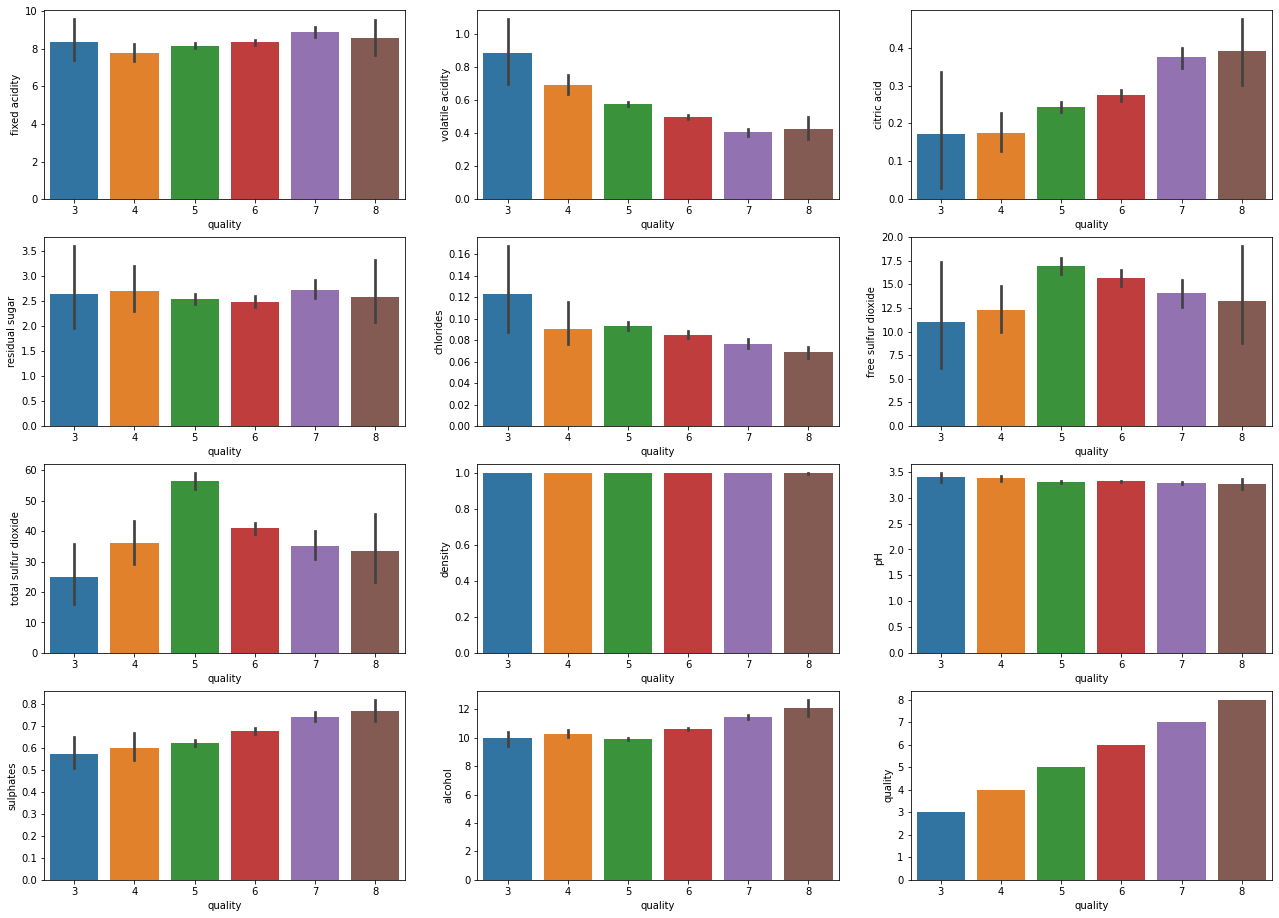

In [79]:
column_names=df.columns.values

number_of_column=len(column_names)

fig, axarr=plt.subplots(4,3, figsize=(22,16))
counter=0
for i in range(4):
  for j in range(3):
    sns.barplot(x='quality', y=column_names[counter],data=df, ax=axarr[i][j])
    counter+=1
    if counter==(number_of_column-1,):
      break

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

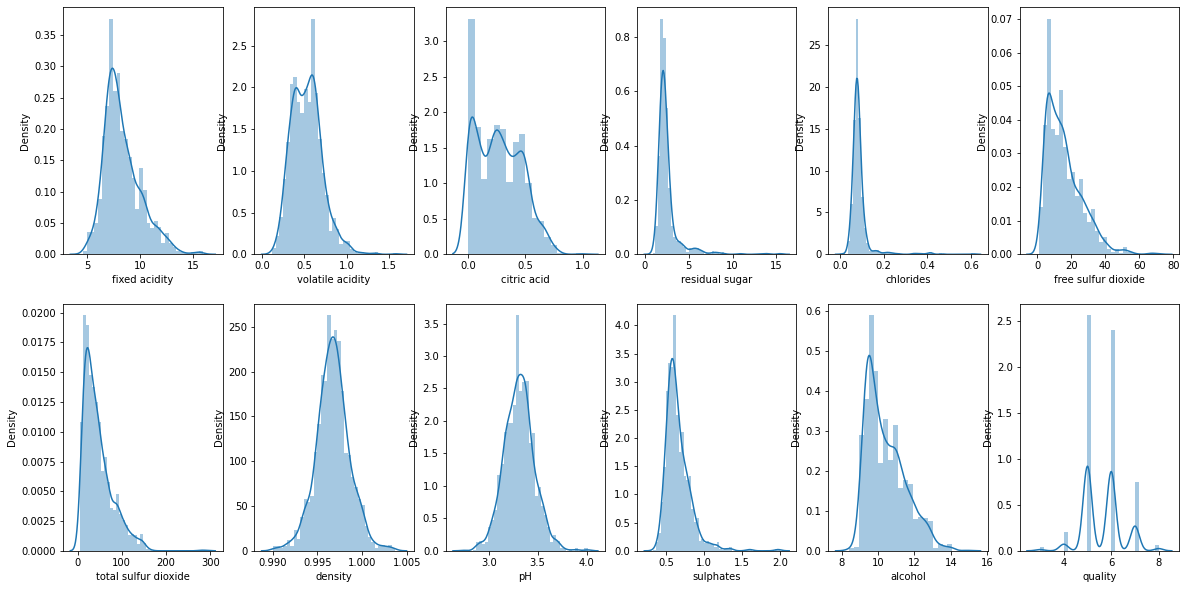

In [80]:
fig,ax = plt.subplots(ncols = 6, nrows = 2,figsize = (20,10))
ax = ax.flatten()
index = 0
for col in df.columns:
    sns.distplot(df[col], ax = ax[index])
    index+=1

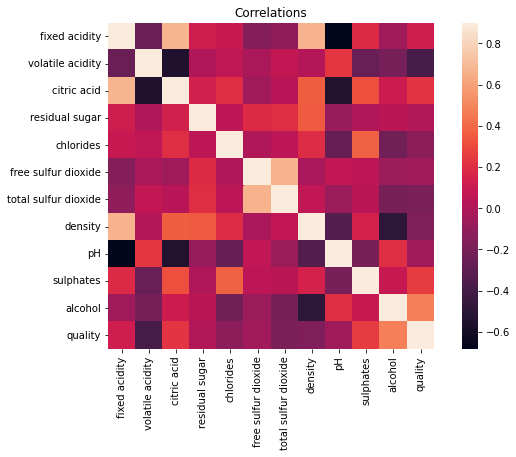

In [81]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Correlations")
plt.show()

**Modeling using ANN**

In [82]:
x = df.drop(["quality"], axis =1)
y = df['quality']

In [83]:
scaler  =StandardScaler()
x = scaler.fit_transform(x)
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [84]:
from tensorflow import keras

def build_model(n_hidden=1, n_neurons=30, learning_rate=0.01, input_shape=[11]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  model.add(keras.layers.BatchNormalization()),
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu", kernel_initializer="he_normal"))
  model.add(keras.layers.Dense(1,activation='linear'))
  optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999)
  model.compile(optimizer ="adam",
                loss='mean_squared_error',
                metrics=['mse', 'mae']
                )
  return model

In [85]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-85-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [86]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
"n_hidden": [1, 2],
"n_neurons": np.arange(20, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
[checkpoint_cb, early_stopping]
early_stopping = EarlyStopping(monitor='val_mse', patience=100)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                           save_best_only=True)
rnd_search_cv.fit(x_train, y_train, epochs=1000,
                  validation_split=0.2,
                  callbacks=[checkpoint_cb, early_stopping])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/1000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 14ms/step - loss: 8.6943 - mse: 8.6943 - mae: 2.4549 - val_loss: 4.4176 - val_mse: 4.4176 - val_mae: 1.6466
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 3.6367 - mse: 3.6367 - mae: 1.5044 - val_loss: 2.9531 - val_mse: 2.9531 - val_mae: 1.4074
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.4379 - mse: 2.4379 - mae: 1.2515 - val_loss: 2.6338 - val_mse: 2.6338 - val_mae: 1.2886
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.3043 - mse: 2.3043 - mae: 1.2041 - val_loss: 2.4460 - val_mse: 2.4460 - val_mae: 1.2413
Epoch 5/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.0346 - mse: 2.0346 - mae: 1.1032 - val_loss: 2.2595 - val_mse: 2.2595 - val_mae: 1.1863
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 1.8767 - mse: 1.8767 - mae: 1.0727 - val_loss: 2.0865 - val_mse: 2.0865 - val_mae: 1.1460
Epoch 7/1000
22/22 [========

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 14ms/step - loss: 14.9966 - mse: 14.9966 - mae: 3.4156 - val_loss: 3.2982 - val_mse: 3.2982 - val_mae: 1.4088
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 3.7020 - mse: 3.7020 - mae: 1.4549 - val_loss: 2.7245 - val_mse: 2.7245 - val_mae: 1.3040
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.3971 - mse: 2.3971 - mae: 1.2544 - val_loss: 2.4885 - val_mse: 2.4885 - val_mae: 1.2378
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.2162 - mse: 2.2162 - mae: 1.1844 - val_loss: 2.2880 - val_mse: 2.2880 - val_mae: 1.1890
Epoch 5/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.0427 - mse: 2.0427 - mae: 1.1451 - val_loss: 2.1841 - val_mse: 2.1841 - val_mae: 1.1536
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 1.8835 - mse: 1.8835 - mae: 1.1062 - val_loss: 2.1070 - val_mse: 2.1070 - val_mae: 1.1208
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 15ms/step - loss: 17.4355 - mse: 17.4355 - mae: 3.7542 - val_loss: 5.7004 - val_mse: 5.7004 - val_mae: 1.9801
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.2022 - mse: 4.2022 - mae: 1.6053 - val_loss: 3.4955 - val_mse: 3.4955 - val_mae: 1.4807
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.9803 - mse: 2.9803 - mae: 1.3900 - val_loss: 2.5126 - val_mse: 2.5126 - val_mae: 1.3018
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.2624 - mse: 2.2624 - mae: 1.1964 - val_loss: 2.0465 - val_mse: 2.0465 - val_mae: 1.1263
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 1.9760 - mse: 1.9760 - mae: 1.1248 - val_loss: 1.8947 - val_mse: 1.8947 - val_mae: 1.0854
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 1.9238 - mse: 1.9238 - mae: 1.0981 - val_loss: 1.8415 - val_mse: 1.8415 - val_mae: 1.0631
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 2s 30ms/step - loss: 44.0570 - mse: 44.0570 - mae: 6.5061 - val_loss: 39.7210 - val_mse: 39.7210 - val_mae: 6.1760
Epoch 2/1000
22/22 [==============================] - 0s 8ms/step - loss: 35.5405 - mse: 35.5405 - mae: 5.8239 - val_loss: 32.3606 - val_mse: 32.3606 - val_mae: 5.5569
Epoch 3/1000
22/22 [==============================] - 0s 9ms/step - loss: 28.6204 - mse: 28.6204 - mae: 5.2075 - val_loss: 26.2263 - val_mse: 26.2263 - val_mae: 4.9716
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 22.9314 - mse: 22.9314 - mae: 4.6188 - val_loss: 21.0099 - val_mse: 21.0099 - val_mae: 4.4069
Epoch 5/1000
22/22 [==============================] - 0s 7ms/step - loss: 18.1782 - mse: 18.1782 - mae: 4.0413 - val_loss: 16.5006 - val_mse: 16.5006 - val_mae: 3.8607
Epoch 6/1000
22/22 [==============================] - 0s 8ms/step - loss: 14.0293 - mse: 14.0293 - mae: 3.4884 - val_loss: 12.7449 - val_mse: 12.7449 - val_mae: 3.3457
Epoc

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 13ms/step - loss: 13.7524 - mse: 13.7524 - mae: 3.4452 - val_loss: 11.1842 - val_mse: 11.1842 - val_mae: 3.0885
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 9.4035 - mse: 9.4035 - mae: 2.7636 - val_loss: 7.5678 - val_mse: 7.5678 - val_mae: 2.4861
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 6.2934 - mse: 6.2934 - mae: 2.2068 - val_loss: 5.2175 - val_mse: 5.2175 - val_mae: 2.0045
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.2865 - mse: 4.2865 - mae: 1.7544 - val_loss: 3.8941 - val_mse: 3.8941 - val_mae: 1.6828
Epoch 5/1000
22/22 [==============================] - 0s 5ms/step - loss: 3.4075 - mse: 3.4075 - mae: 1.5404 - val_loss: 3.2386 - val_mse: 3.2386 - val_mae: 1.4865
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.8668 - mse: 2.8668 - mae: 1.3743 - val_loss: 2.9537 - val_mse: 2.9537 - val_mae: 1.3842
Epoch 7/1000
22/22 [====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 14ms/step - loss: 18.8050 - mse: 18.8050 - mae: 4.1003 - val_loss: 16.2894 - val_mse: 16.2894 - val_mae: 3.8155
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 13.6243 - mse: 13.6243 - mae: 3.3920 - val_loss: 11.6704 - val_mse: 11.6704 - val_mae: 3.1581
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 9.8761 - mse: 9.8761 - mae: 2.7950 - val_loss: 8.4605 - val_mse: 8.4605 - val_mae: 2.6064
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 7.2494 - mse: 7.2494 - mae: 2.3249 - val_loss: 6.4407 - val_mse: 6.4407 - val_mae: 2.2228
Epoch 5/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.5359 - mse: 5.5359 - mae: 1.9731 - val_loss: 5.1626 - val_mse: 5.1626 - val_mae: 1.9450
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.3517 - mse: 4.3517 - mae: 1.7282 - val_loss: 4.3751 - val_mse: 4.3751 - val_mae: 1.7555
Epoch 7/1000
22/22 [

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 14ms/step - loss: 31.5075 - mse: 31.5075 - mae: 5.4400 - val_loss: 26.1058 - val_mse: 26.1058 - val_mae: 4.9562
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 24.3256 - mse: 24.3256 - mae: 4.7287 - val_loss: 19.8793 - val_mse: 19.8793 - val_mae: 4.2592
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 18.5447 - mse: 18.5447 - mae: 4.0614 - val_loss: 15.0032 - val_mse: 15.0032 - val_mae: 3.6451
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 14.3773 - mse: 14.3773 - mae: 3.4978 - val_loss: 11.2164 - val_mse: 11.2164 - val_mae: 3.0830
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 11.0679 - mse: 11.0679 - mae: 3.0151 - val_loss: 8.5521 - val_mse: 8.5521 - val_mae: 2.6260
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 8.9128 - mse: 8.9128 - mae: 2.6298 - val_loss: 6.7436 - val_mse: 6.7436 - val_mae: 2.2744
Epoch 7/10

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 13ms/step - loss: 23.5896 - mse: 23.5896 - mae: 4.7331 - val_loss: 20.8684 - val_mse: 20.8684 - val_mae: 4.4447
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 17.9879 - mse: 17.9879 - mae: 4.0700 - val_loss: 15.7621 - val_mse: 15.7621 - val_mae: 3.8047
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 13.2416 - mse: 13.2416 - mae: 3.4246 - val_loss: 11.5477 - val_mse: 11.5477 - val_mae: 3.1821
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 9.6132 - mse: 9.6132 - mae: 2.8646 - val_loss: 8.2929 - val_mse: 8.2929 - val_mae: 2.6117
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 6.9121 - mse: 6.9121 - mae: 2.3427 - val_loss: 6.0445 - val_mse: 6.0445 - val_mae: 2.1498
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.2571 - mse: 5.2571 - mae: 1.9960 - val_loss: 4.6265 - val_mse: 4.6265 - val_mae: 1.8406
Epoch 7/1000
22/

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 13ms/step - loss: 40.6460 - mse: 40.6460 - mae: 6.1684 - val_loss: 36.1944 - val_mse: 36.1944 - val_mae: 5.8011
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 32.1416 - mse: 32.1416 - mae: 5.4687 - val_loss: 28.7459 - val_mse: 28.7459 - val_mae: 5.1504
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 25.0174 - mse: 25.0174 - mae: 4.7803 - val_loss: 22.5673 - val_mse: 22.5673 - val_mae: 4.5343
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 19.4927 - mse: 19.4927 - mae: 4.1668 - val_loss: 17.4906 - val_mse: 17.4906 - val_mae: 3.9375
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 14.8126 - mse: 14.8126 - mae: 3.5743 - val_loss: 13.2514 - val_mse: 13.2514 - val_mae: 3.3775
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 11.0262 - mse: 11.0262 - mae: 3.0189 - val_loss: 9.8935 - val_mse: 9.8935 - val_mae: 2.8645
Epoch 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 15ms/step - loss: 29.4017 - mse: 29.4017 - mae: 5.2571 - val_loss: 17.7334 - val_mse: 17.7334 - val_mae: 4.0215
Epoch 2/1000
22/22 [==============================] - 0s 7ms/step - loss: 12.0404 - mse: 12.0404 - mae: 3.2040 - val_loss: 7.4846 - val_mse: 7.4846 - val_mae: 2.4203
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.7625 - mse: 5.7625 - mae: 2.0339 - val_loss: 4.9246 - val_mse: 4.9246 - val_mae: 1.8071
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.0500 - mse: 4.0500 - mae: 1.5974 - val_loss: 3.8962 - val_mse: 3.8962 - val_mae: 1.5932
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.1171 - mse: 3.1171 - mae: 1.3891 - val_loss: 3.3157 - val_mse: 3.3157 - val_mae: 1.4829
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.8483 - mse: 2.8483 - mae: 1.3425 - val_loss: 2.9637 - val_mse: 2.9637 - val_mae: 1.4094
Epoch 7/1000
22/22 [==

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 20ms/step - loss: 19.9950 - mse: 19.9950 - mae: 4.1914 - val_loss: 11.4016 - val_mse: 11.4016 - val_mae: 3.0584
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 8.2709 - mse: 8.2709 - mae: 2.4948 - val_loss: 5.7016 - val_mse: 5.7016 - val_mae: 1.9798
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 5.2555 - mse: 5.2555 - mae: 1.8698 - val_loss: 4.8904 - val_mse: 4.8904 - val_mae: 1.7954
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.2277 - mse: 4.2277 - mae: 1.6855 - val_loss: 4.1796 - val_mse: 4.1796 - val_mae: 1.6486
Epoch 5/1000
22/22 [==============================] - 0s 5ms/step - loss: 3.4337 - mse: 3.4337 - mae: 1.4959 - val_loss: 3.6214 - val_mse: 3.6214 - val_mae: 1.5261
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 3.0508 - mse: 3.0508 - mae: 1.4148 - val_loss: 3.2188 - val_mse: 3.2188 - val_mae: 1.4431
Epoch 7/1000
22/22 [====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 16ms/step - loss: 32.6098 - mse: 32.6098 - mae: 5.5210 - val_loss: 21.4083 - val_mse: 21.4083 - val_mae: 4.3582
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 13.8473 - mse: 13.8473 - mae: 3.3760 - val_loss: 9.7873 - val_mse: 9.7873 - val_mae: 2.7921
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 6.1941 - mse: 6.1941 - mae: 2.0841 - val_loss: 5.9044 - val_mse: 5.9044 - val_mae: 1.9371
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.0281 - mse: 4.0281 - mae: 1.6398 - val_loss: 3.9389 - val_mse: 3.9389 - val_mae: 1.5705
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.9387 - mse: 2.9387 - mae: 1.3861 - val_loss: 3.0404 - val_mse: 3.0404 - val_mae: 1.3742
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.6201 - mse: 2.6201 - mae: 1.3137 - val_loss: 2.5499 - val_mse: 2.5499 - val_mae: 1.2554
Epoch 7/1000
22/22 [==

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 16ms/step - loss: 26.1216 - mse: 26.1216 - mae: 4.8757 - val_loss: 15.4013 - val_mse: 15.4013 - val_mae: 3.6924
Epoch 2/1000
22/22 [==============================] - 0s 7ms/step - loss: 8.8191 - mse: 8.8191 - mae: 2.6363 - val_loss: 4.9918 - val_mse: 4.9918 - val_mae: 1.9025
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.0578 - mse: 4.0578 - mae: 1.6235 - val_loss: 3.7889 - val_mse: 3.7889 - val_mae: 1.5579
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 3.5349 - mse: 3.5349 - mae: 1.4968 - val_loss: 3.3662 - val_mse: 3.3662 - val_mae: 1.4762
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.0148 - mse: 3.0148 - mae: 1.3931 - val_loss: 3.0733 - val_mse: 3.0733 - val_mae: 1.4090
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.7391 - mse: 2.7391 - mae: 1.3161 - val_loss: 2.8881 - val_mse: 2.8881 - val_mae: 1.3570
Epoch 7/1000
22/22 [====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 2s 14ms/step - loss: 19.8754 - mse: 19.8754 - mae: 4.2213 - val_loss: 10.7976 - val_mse: 10.7976 - val_mae: 3.0023
Epoch 2/1000
22/22 [==============================] - 0s 7ms/step - loss: 6.6465 - mse: 6.6465 - mae: 2.2359 - val_loss: 5.0482 - val_mse: 5.0482 - val_mae: 1.9153
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.9899 - mse: 3.9899 - mae: 1.6029 - val_loss: 3.6310 - val_mse: 3.6310 - val_mae: 1.5671
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.9032 - mse: 2.9032 - mae: 1.3655 - val_loss: 3.0231 - val_mse: 3.0231 - val_mae: 1.4183
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.4211 - mse: 2.4211 - mae: 1.2582 - val_loss: 2.6273 - val_mse: 2.6273 - val_mae: 1.3034
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.1405 - mse: 2.1405 - mae: 1.1595 - val_loss: 2.4184 - val_mse: 2.4184 - val_mae: 1.2464
Epoch 7/1000
22/22 [====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 15ms/step - loss: 12.6566 - mse: 12.6566 - mae: 3.2778 - val_loss: 7.2551 - val_mse: 7.2551 - val_mae: 2.2883
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9676 - mse: 4.9676 - mae: 1.7740 - val_loss: 4.5222 - val_mse: 4.5222 - val_mae: 1.6514
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.4575 - mse: 3.4575 - mae: 1.4844 - val_loss: 3.4812 - val_mse: 3.4812 - val_mae: 1.4711
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 2.9407 - mse: 2.9407 - mae: 1.3875 - val_loss: 3.1069 - val_mse: 3.1069 - val_mae: 1.3580
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.6473 - mse: 2.6473 - mae: 1.3104 - val_loss: 2.9152 - val_mse: 2.9152 - val_mae: 1.3223
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.4899 - mse: 2.4899 - mae: 1.2579 - val_loss: 2.7177 - val_mse: 2.7177 - val_mae: 1.2697
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 14ms/step - loss: 28.8842 - mse: 28.8842 - mae: 5.1395 - val_loss: 18.4389 - val_mse: 18.4389 - val_mae: 4.0229
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 13.2410 - mse: 13.2410 - mae: 3.2777 - val_loss: 8.1446 - val_mse: 8.1446 - val_mae: 2.4640
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 6.8584 - mse: 6.8584 - mae: 2.2221 - val_loss: 4.7831 - val_mse: 4.7831 - val_mae: 1.7959
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 4.3359 - mse: 4.3359 - mae: 1.7060 - val_loss: 3.6727 - val_mse: 3.6727 - val_mae: 1.5639
Epoch 5/1000
22/22 [==============================] - 0s 5ms/step - loss: 3.4475 - mse: 3.4475 - mae: 1.5168 - val_loss: 3.2421 - val_mse: 3.2421 - val_mae: 1.4399
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.9751 - mse: 2.9751 - mae: 1.3766 - val_loss: 3.0177 - val_mse: 3.0177 - val_mae: 1.3657
Epoch 7/1000
22/22 [==

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 14ms/step - loss: 18.7127 - mse: 18.7127 - mae: 4.0398 - val_loss: 9.5763 - val_mse: 9.5763 - val_mae: 2.7835
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 6.0980 - mse: 6.0980 - mae: 2.0804 - val_loss: 4.5677 - val_mse: 4.5677 - val_mae: 1.7504
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.8877 - mse: 3.8877 - mae: 1.5712 - val_loss: 3.8579 - val_mse: 3.8579 - val_mae: 1.5601
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 3.0227 - mse: 3.0227 - mae: 1.3992 - val_loss: 3.5275 - val_mse: 3.5275 - val_mae: 1.5006
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.6622 - mse: 2.6622 - mae: 1.3092 - val_loss: 3.2479 - val_mse: 3.2479 - val_mae: 1.4093
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.4509 - mse: 2.4509 - mae: 1.2543 - val_loss: 3.0568 - val_mse: 3.0568 - val_mae: 1.3383
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 15ms/step - loss: 30.6462 - mse: 30.6462 - mae: 5.3903 - val_loss: 19.0748 - val_mse: 19.0748 - val_mae: 4.2482
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 13.3108 - mse: 13.3108 - mae: 3.3927 - val_loss: 8.1734 - val_mse: 8.1734 - val_mae: 2.5610
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 6.4617 - mse: 6.4617 - mae: 2.1756 - val_loss: 5.7781 - val_mse: 5.7781 - val_mae: 1.9752
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.9239 - mse: 4.9239 - mae: 1.8465 - val_loss: 4.8175 - val_mse: 4.8175 - val_mae: 1.7882
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.1047 - mse: 4.1047 - mae: 1.6847 - val_loss: 4.1000 - val_mse: 4.1000 - val_mae: 1.6331
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.7494 - mse: 3.7494 - mae: 1.5841 - val_loss: 3.6187 - val_mse: 3.6187 - val_mae: 1.5224
Epoch 7/1000
22/22 [==

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 16ms/step - loss: 9.2990 - mse: 9.2990 - mae: 2.6230 - val_loss: 4.2860 - val_mse: 4.2860 - val_mae: 1.6130
Epoch 2/1000
22/22 [==============================] - 0s 7ms/step - loss: 4.3951 - mse: 4.3951 - mae: 1.6183 - val_loss: 3.2266 - val_mse: 3.2266 - val_mae: 1.4615
Epoch 3/1000
22/22 [==============================] - 0s 8ms/step - loss: 3.1193 - mse: 3.1193 - mae: 1.4037 - val_loss: 2.4705 - val_mse: 2.4705 - val_mae: 1.2398
Epoch 4/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.5419 - mse: 2.5419 - mae: 1.2667 - val_loss: 2.2626 - val_mse: 2.2626 - val_mae: 1.1852
Epoch 5/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.1719 - mse: 2.1719 - mae: 1.1463 - val_loss: 2.1484 - val_mse: 2.1484 - val_mae: 1.1603
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.0179 - mse: 2.0179 - mae: 1.1094 - val_loss: 1.9479 - val_mse: 1.9479 - val_mae: 1.0979
Epoch 7/1000
22/22 [========

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 16ms/step - loss: 22.5926 - mse: 22.5926 - mae: 4.2670 - val_loss: 8.0535 - val_mse: 8.0535 - val_mae: 2.3718
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.3581 - mse: 5.3581 - mae: 1.7898 - val_loss: 4.1023 - val_mse: 4.1023 - val_mae: 1.4182
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.3716 - mse: 3.3716 - mae: 1.4467 - val_loss: 2.8983 - val_mse: 2.8983 - val_mae: 1.2878
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.5698 - mse: 2.5698 - mae: 1.2852 - val_loss: 2.5200 - val_mse: 2.5200 - val_mae: 1.1891
Epoch 5/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.3063 - mse: 2.3063 - mae: 1.2544 - val_loss: 2.3191 - val_mse: 2.3191 - val_mae: 1.1521
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.0272 - mse: 2.0272 - mae: 1.1436 - val_loss: 2.1836 - val_mse: 2.1836 - val_mae: 1.1245
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 16ms/step - loss: 33.9104 - mse: 33.9104 - mae: 5.4623 - val_loss: 10.0378 - val_mse: 10.0378 - val_mae: 2.9665
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.5923 - mse: 5.5923 - mae: 1.9960 - val_loss: 5.0884 - val_mse: 5.0884 - val_mae: 1.7612
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.9334 - mse: 3.9334 - mae: 1.5788 - val_loss: 3.4287 - val_mse: 3.4287 - val_mae: 1.5168
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.8118 - mse: 2.8118 - mae: 1.3504 - val_loss: 2.6167 - val_mse: 2.6167 - val_mae: 1.2636
Epoch 5/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.3964 - mse: 2.3964 - mae: 1.2298 - val_loss: 2.2775 - val_mse: 2.2775 - val_mae: 1.1639
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.2151 - mse: 2.2151 - mae: 1.1683 - val_loss: 2.0145 - val_mse: 2.0145 - val_mae: 1.0982
Epoch 7/1000
22/22 [====

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 15ms/step - loss: 9.5107 - mse: 9.5107 - mae: 2.5705 - val_loss: 3.7057 - val_mse: 3.7057 - val_mae: 1.4685
Epoch 2/1000
22/22 [==============================] - 0s 7ms/step - loss: 3.2735 - mse: 3.2735 - mae: 1.4299 - val_loss: 2.9134 - val_mse: 2.9134 - val_mae: 1.3918
Epoch 3/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.5819 - mse: 2.5819 - mae: 1.2861 - val_loss: 2.4495 - val_mse: 2.4495 - val_mae: 1.2480
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.2568 - mse: 2.2568 - mae: 1.1830 - val_loss: 2.3304 - val_mse: 2.3304 - val_mae: 1.2173
Epoch 5/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.0492 - mse: 2.0492 - mae: 1.1506 - val_loss: 2.1969 - val_mse: 2.1969 - val_mae: 1.1814
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 1.8834 - mse: 1.8834 - mae: 1.0878 - val_loss: 2.0906 - val_mse: 2.0906 - val_mae: 1.1581
Epoch 7/1000
22/22 [========

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 23ms/step - loss: 10.8643 - mse: 10.8643 - mae: 2.8135 - val_loss: 5.8645 - val_mse: 5.8645 - val_mae: 1.8340
Epoch 2/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.6358 - mse: 3.6358 - mae: 1.5149 - val_loss: 3.8899 - val_mse: 3.8899 - val_mae: 1.5481
Epoch 3/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.6990 - mse: 2.6990 - mae: 1.3374 - val_loss: 3.3306 - val_mse: 3.3306 - val_mae: 1.3961
Epoch 4/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.1665 - mse: 2.1665 - mae: 1.1757 - val_loss: 2.9338 - val_mse: 2.9338 - val_mae: 1.3144
Epoch 5/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.9307 - mse: 1.9307 - mae: 1.1120 - val_loss: 2.6672 - val_mse: 2.6672 - val_mae: 1.2513
Epoch 6/1000
22/22 [==============================] - 0s 9ms/step - loss: 1.8811 - mse: 1.8811 - mae: 1.1043 - val_loss: 2.5131 - val_mse: 2.5131 - val_mae: 1.2103
Epoch 7/1000
22/22 [==

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 16ms/step - loss: 10.8546 - mse: 10.8546 - mae: 2.7817 - val_loss: 5.8819 - val_mse: 5.8819 - val_mae: 1.8624
Epoch 2/1000
22/22 [==============================] - 0s 8ms/step - loss: 3.7201 - mse: 3.7201 - mae: 1.5613 - val_loss: 3.3032 - val_mse: 3.3032 - val_mae: 1.4656
Epoch 3/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.5371 - mse: 2.5371 - mae: 1.2674 - val_loss: 2.5722 - val_mse: 2.5722 - val_mae: 1.2714
Epoch 4/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.2911 - mse: 2.2911 - mae: 1.1790 - val_loss: 2.2822 - val_mse: 2.2822 - val_mae: 1.1797
Epoch 5/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.0533 - mse: 2.0533 - mae: 1.1356 - val_loss: 2.0249 - val_mse: 2.0249 - val_mae: 1.1162
Epoch 6/1000
22/22 [==============================] - 0s 8ms/step - loss: 1.8524 - mse: 1.8524 - mae: 1.0721 - val_loss: 2.0405 - val_mse: 2.0405 - val_mae: 1.0739
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 17ms/step - loss: 21.1243 - mse: 21.1243 - mae: 4.3534 - val_loss: 8.7000 - val_mse: 8.7000 - val_mae: 2.6976
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 5.2398 - mse: 5.2398 - mae: 1.9244 - val_loss: 4.0552 - val_mse: 4.0552 - val_mae: 1.5763
Epoch 3/1000
22/22 [==============================] - 0s 7ms/step - loss: 3.6171 - mse: 3.6171 - mae: 1.4716 - val_loss: 3.1348 - val_mse: 3.1348 - val_mae: 1.4429
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.8576 - mse: 2.8576 - mae: 1.3529 - val_loss: 2.6998 - val_mse: 2.6998 - val_mae: 1.3519
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.5003 - mse: 2.5003 - mae: 1.2559 - val_loss: 2.4364 - val_mse: 2.4364 - val_mae: 1.2819
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.1412 - mse: 2.1412 - mae: 1.1508 - val_loss: 2.2376 - val_mse: 2.2376 - val_mae: 1.2248
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 15ms/step - loss: 18.5661 - mse: 18.5661 - mae: 3.9746 - val_loss: 7.0346 - val_mse: 7.0346 - val_mae: 2.3519
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.8753 - mse: 4.8753 - mae: 1.7882 - val_loss: 4.4380 - val_mse: 4.4380 - val_mae: 1.6194
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.2849 - mse: 3.2849 - mae: 1.4582 - val_loss: 3.6779 - val_mse: 3.6779 - val_mae: 1.5440
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.6089 - mse: 2.6089 - mae: 1.3186 - val_loss: 3.2513 - val_mse: 3.2513 - val_mae: 1.4252
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.4311 - mse: 2.4311 - mae: 1.2666 - val_loss: 2.9904 - val_mse: 2.9904 - val_mae: 1.3581
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 2.2843 - mse: 2.2843 - mae: 1.2173 - val_loss: 2.7779 - val_mse: 2.7779 - val_mae: 1.2993
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 14ms/step - loss: 18.1085 - mse: 18.1085 - mae: 3.9283 - val_loss: 6.1373 - val_mse: 6.1373 - val_mae: 2.1844
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 4.1167 - mse: 4.1167 - mae: 1.6375 - val_loss: 3.4452 - val_mse: 3.4452 - val_mae: 1.4249
Epoch 3/1000
22/22 [==============================] - 0s 7ms/step - loss: 3.2166 - mse: 3.2166 - mae: 1.4486 - val_loss: 2.8037 - val_mse: 2.8037 - val_mae: 1.3543
Epoch 4/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.7465 - mse: 2.7465 - mae: 1.3473 - val_loss: 2.3901 - val_mse: 2.3901 - val_mae: 1.2167
Epoch 5/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.4181 - mse: 2.4181 - mae: 1.2377 - val_loss: 2.1554 - val_mse: 2.1554 - val_mae: 1.1548
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 2.2079 - mse: 2.2079 - mae: 1.2025 - val_loss: 2.0782 - val_mse: 2.0782 - val_mae: 1.1388
Epoch 7/1000
22/22 [======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 15ms/step - loss: 30.6268 - mse: 30.6268 - mae: 5.3952 - val_loss: 22.3642 - val_mse: 22.3642 - val_mae: 4.5732
Epoch 2/1000
22/22 [==============================] - 0s 7ms/step - loss: 17.0533 - mse: 17.0533 - mae: 3.9160 - val_loss: 12.3632 - val_mse: 12.3632 - val_mae: 3.3013
Epoch 3/1000
22/22 [==============================] - 0s 7ms/step - loss: 9.0613 - mse: 9.0613 - mae: 2.7316 - val_loss: 7.1381 - val_mse: 7.1381 - val_mae: 2.3479
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 5.3663 - mse: 5.3663 - mae: 1.9893 - val_loss: 4.8209 - val_mse: 4.8209 - val_mae: 1.7927
Epoch 5/1000
22/22 [==============================] - 0s 7ms/step - loss: 3.7008 - mse: 3.7008 - mae: 1.5953 - val_loss: 3.9640 - val_mse: 3.9640 - val_mae: 1.5639
Epoch 6/1000
22/22 [==============================] - 0s 8ms/step - loss: 3.2274 - mse: 3.2274 - mae: 1.4608 - val_loss: 3.5047 - val_mse: 3.5047 - val_mae: 1.4586
Epoch 7/1000
22/22 [

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 14ms/step - loss: 30.5131 - mse: 30.5131 - mae: 5.3971 - val_loss: 23.8481 - val_mse: 23.8481 - val_mae: 4.7501
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 16.4180 - mse: 16.4180 - mae: 3.8561 - val_loss: 12.8889 - val_mse: 12.8889 - val_mae: 3.3915
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 8.3164 - mse: 8.3164 - mae: 2.5950 - val_loss: 7.0074 - val_mse: 7.0074 - val_mae: 2.3926
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 4.5081 - mse: 4.5081 - mae: 1.8042 - val_loss: 4.5163 - val_mse: 4.5163 - val_mae: 1.7989
Epoch 5/1000
22/22 [==============================] - 0s 7ms/step - loss: 3.4001 - mse: 3.4001 - mae: 1.5292 - val_loss: 3.6453 - val_mse: 3.6453 - val_mae: 1.5605
Epoch 6/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.8825 - mse: 2.8825 - mae: 1.3694 - val_loss: 3.2378 - val_mse: 3.2378 - val_mae: 1.4505
Epoch 7/1000
22/22 [

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 15ms/step - loss: 31.4081 - mse: 31.4081 - mae: 5.4826 - val_loss: 23.3153 - val_mse: 23.3153 - val_mae: 4.6745
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 17.2689 - mse: 17.2689 - mae: 3.9441 - val_loss: 12.8278 - val_mse: 12.8278 - val_mae: 3.3469
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 9.0463 - mse: 9.0463 - mae: 2.7227 - val_loss: 7.2810 - val_mse: 7.2810 - val_mae: 2.4105
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 5.3646 - mse: 5.3646 - mae: 1.9838 - val_loss: 4.8339 - val_mse: 4.8339 - val_mae: 1.8617
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 3.8511 - mse: 3.8511 - mae: 1.6464 - val_loss: 3.8122 - val_mse: 3.8122 - val_mae: 1.5991
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 3.2795 - mse: 3.2795 - mae: 1.4789 - val_loss: 3.2273 - val_mse: 3.2273 - val_mae: 1.4527
Epoch 7/1000
22/22 [

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f81445a1d90>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8144619700>,
                                        'n_hidden': [1, 2],
                                        'n_neurons': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [87]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
model = rnd_search_cv.best_estimator_.model

{'learning_rate': 0.00033749292187239906, 'n_hidden': 1, 'n_neurons': 93}
-0.4717836876710256


In [88]:
model.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_123 (Ba  (None, 11)               44        
 tchNormalization)                                               
                                                                 
 dense_308 (Dense)           (None, 93)                1116      
                                                                 
 dense_309 (Dense)           (None, 1)                 94        
                                                                 
Total params: 1,254
Trainable params: 1,232
Non-trainable params: 22
_________________________________________________________________


In [89]:
def accuracy(y, y_preds): # acc = Tp / Total
    true_counter = 0
    for i in range(len(y)):
        if y[i] == np.round(y_preds[i]) or abs(y[i] - np.round(y_preds[i]) == 1): # margin 1 is accepted
            true_counter += 1
    return (true_counter / len(y)) * 100

In [90]:
y_trainPreds = model.predict(x_train)
model.evaluate(x_train, y_train) 

40/40 [==============================] - 0s 2ms/step - loss: 0.2645 - mse: 0.2645 - mae: 0.3960


[0.2645290791988373, 0.2645290791988373, 0.39598965644836426]

In [91]:
y_train = y_train.reset_index(drop = True)
accuracy(y_train, y_trainPreds)

83.18999218139172

In [92]:
y_testPreds = model.predict(x_test)
model.evaluate(x_test, y_testPreds) 

10/10 [==============================] - 0s 2ms/step - loss: 1.7977e-13 - mse: 1.7977e-13 - mae: 2.9951e-07


[1.7976730672629448e-13, 1.7976730672629448e-13, 2.995133456806798e-07]

In [93]:
y_test = y_test.reset_index(drop = True)
accuracy(y_test, y_testPreds)

80.9375

In [94]:
# keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [95]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=100)
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
#                                                 save_best_only=True)
# history = keras_reg.fit(x_train,y_train, validation_split=0.2, batch_size = 256, epochs = 1000, callbacks=[checkpoint_cb, early_stopping])
# model = keras.models.load_model("my_keras_model.h5")